In [1]:
from qiskit import QuantumCircuit
from src.experiment import qcec_experiment

In [2]:
import os

original_circuit_list = []
original_circuit_names = []
original_directory = "../circuits/original/"
for filename in sorted(os.listdir(original_directory)):
    if filename.endswith(".qasm"): 
        circ = QuantumCircuit.from_qasm_file(original_directory+filename)
        original_circuit_names.append(original_directory+filename)
        original_circuit_list.append(circ)
        

transpiled_circuit_list = []
transpiled_circuit_names = []
transpiled_directory = "../circuits/transpiled/"
for filename in sorted(os.listdir(transpiled_directory)):
    if filename.endswith(".qasm"): 
        circ = QuantumCircuit.from_qasm_file(transpiled_directory+filename)
        transpiled_circuit_names.append(transpiled_directory+filename)
        transpiled_circuit_list.append(circ)

In [3]:
# from src.inject_error import inject_error
# inject_error(transpiled_circuit_list[4], 'toffoli_beginning', num_errors=1)

In [4]:
# for circ in original_circuit_list:
#     print(circ.num_qubits)

In [5]:
# for circ in transpiled_circuit_list:
#     print(circ.num_qubits)
    

In [6]:
experiments = {"Remove 1 random gate": ("remove", 1), "Remove 2 random gates": ("remove", 2), 
 "Remove 3 random gates": ("remove", 3), "Add 1 random gate": ("insert", 1), 
 "Add 2 random gate": ("insert", 2), "Add 3 random gate": ("insert", 3),
 "Add 10 random Toffolis at beginning": ("toffoli_beginning", 10), 
 "Add 10 random Toffolis at end": ("toffoli_end", 10)}

In [7]:
df, df_main = qcec_experiment(original_circuit_list, transpiled_circuit_list, experiments)

In [8]:
df

classical       local      global
Remove 1 random gate                Ps  88.3 ± 25.7  98.5 ± 6.5  98.2 ± 7.0
                                    ∅s    1.4 ± 1.2   1.0 ± 0.2   1.0 ± 0.2
                                    ∅t    0.5 ± 0.3   0.5 ± 0.3   0.6 ± 0.4
Remove 2 random gates               Ps  91.7 ± 23.2  98.6 ± 6.4  98.3 ± 6.9
                                    ∅s    1.3 ± 1.0   1.0 ± 0.2   1.0 ± 0.1
                                    ∅t    0.5 ± 0.3   0.5 ± 0.3   0.6 ± 0.4
Remove 3 random gates               Ps  93.9 ± 21.4  98.7 ± 6.1  98.4 ± 6.9
                                    ∅s    1.2 ± 1.0   1.0 ± 0.1   1.0 ± 0.1
                                    ∅t    0.5 ± 0.3   0.5 ± 0.3   0.6 ± 0.4
Add 1 random gate                   Ps  82.7 ± 27.2  98.5 ± 5.8  98.1 ± 7.1
                                    ∅s    1.4 ± 1.2   1.0 ± 0.1   1.0 ± 0.2
                                    ∅t    0.4 ± 0.3   0.4 ± 0.3   0.5 ± 0.3
Add 2 random gate                   Ps  85.8 ± 25.7  98.0 ± 7.2  97.7 ± 7.6
                                    ∅s    1.3 ± 1.0   1.0 ± 0.1   1.0 ± 0.2
                                    ∅t    0.4 ± 0.3   0.5 ± 0.3   0.5 ± 0.4
Add 3 random gate                   Ps  89.9 ± 22.5  98.3 ± 6.3  98.5 ± 6.1
                                    ∅s    1.3 ± 0.9   1.0 ± 0.1   1.0 ± 0.1
                                    ∅t    0.4 ± 0.3   0.4 ± 0.3   0.5 ± 0.3
Add 10 random Toffolis at beginning Ps  79.3 ± 27.7  98.4 ± 6.3  98.2 ± 6.1
                                    ∅s    1.5 ± 1.2   1.0 ± 0.1   1.0 ± 0.1
                                    ∅t    0.4 ± 0.3   0.4 ± 0.3   0.5 ± 0.3
Add 10 random Toffolis at end       Ps  78.6 ± 27.2  98.2 ± 6.8  97.5 ± 8.5
                                    ∅s    1.5 ± 1.2   1.0 ± 0.2   1.0 ± 0.2
                                    ∅t    0.4 ± 0.3   0.4 ± 0.3   0.5 ± 0.3
Overall                             Ps   86.3 ±25.1   98.4 ±6.4   98.1 ±7.0
                                    ∅s     1.4 ±1.1    1.0 ±0.1    1.0 ±0.2
                                    ∅t     0.4 ±0.3    0.5 ±0.3    0.5 ±0.4

In [9]:
import pandas as pd

In [10]:
pd.DataFrame.to_latex(df)

/tmp/ipykernel_59167/4010859930.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame.to_latex(df)


'\\begin{tabular}{lllll}\n\\toprule\n        &    &    classical &       local &      global \\\\\n\\midrule\nRemove 1 random gate & Ps &  88.3 ± 25.7 &  98.5 ± 6.5 &  98.2 ± 7.0 \\\\\n        & ∅s &    1.4 ± 1.2 &   1.0 ± 0.2 &   1.0 ± 0.2 \\\\\n        & ∅t &    0.5 ± 0.3 &   0.5 ± 0.3 &   0.6 ± 0.4 \\\\\nRemove 2 random gates & Ps &  91.7 ± 23.2 &  98.6 ± 6.4 &  98.3 ± 6.9 \\\\\n        & ∅s &    1.3 ± 1.0 &   1.0 ± 0.2 &   1.0 ± 0.1 \\\\\n        & ∅t &    0.5 ± 0.3 &   0.5 ± 0.3 &   0.6 ± 0.4 \\\\\nRemove 3 random gates & Ps &  93.9 ± 21.4 &  98.7 ± 6.1 &  98.4 ± 6.9 \\\\\n        & ∅s &    1.2 ± 1.0 &   1.0 ± 0.1 &   1.0 ± 0.1 \\\\\n        & ∅t &    0.5 ± 0.3 &   0.5 ± 0.3 &   0.6 ± 0.4 \\\\\nAdd 1 random gate & Ps &  82.7 ± 27.2 &  98.5 ± 5.8 &  98.1 ± 7.1 \\\\\n        & ∅s &    1.4 ± 1.2 &   1.0 ± 0.1 &   1.0 ± 0.2 \\\\\n        & ∅t &    0.4 ± 0.3 &   0.4 ± 0.3 &   0.5 ± 0.3 \\\\\nAdd 2 random gate & Ps &  85.8 ± 25.7 &  98.0 ± 7.2 &  97.7 ± 7.6 \\\\\n        & ∅s &    1.3 ±

In [11]:
df.to_csv("qcec_experiment_00.csv")

In [12]:
pd.read_csv("qcec_experiment_00.csv")

,Unnamed: 0,Unnamed: 1,classical,local,global
0,Remove 1 random gate,Ps,88.3 ± 25.7,98.5 ± 6.5,98.2 ± 7.0
1,Remove 1 random gate,∅s,1.4 ± 1.2,1.0 ± 0.2,1.0 ± 0.2
2,Remove 1 random gate,∅t,0.5 ± 0.3,0.5 ± 0.3,0.6 ± 0.4
3,Remove 2 random gates,Ps,91.7 ± 23.2,98.6 ± 6.4,98.3 ± 6.9
4,Remove 2 random gates,∅s,1.3 ± 1.0,1.0 ± 0.2,1.0 ± 0.1
5,Remove 2 random gates,∅t,0.5 ± 0.3,0.5 ± 0.3,0.6 ± 0.4
6,Remove 3 random gates,Ps,93.9 ± 21.4,98.7 ± 6.1,98.4 ± 6.9
7,Remove 3 random gates,∅s,1.2 ± 1.0,1.0 ± 0.1,1.0 ± 0.1
8,Remove 3 random gates,∅t,0.5 ± 0.3,0.5 ± 0.3,0.6 ± 0.4
9,Add 1 random gate,Ps,82.7 ± 27.2,98.5 ± 5.8,98.1 ± 7.1


In [78]:
df_main.to_csv("main_qcec_experiment_00.csv")

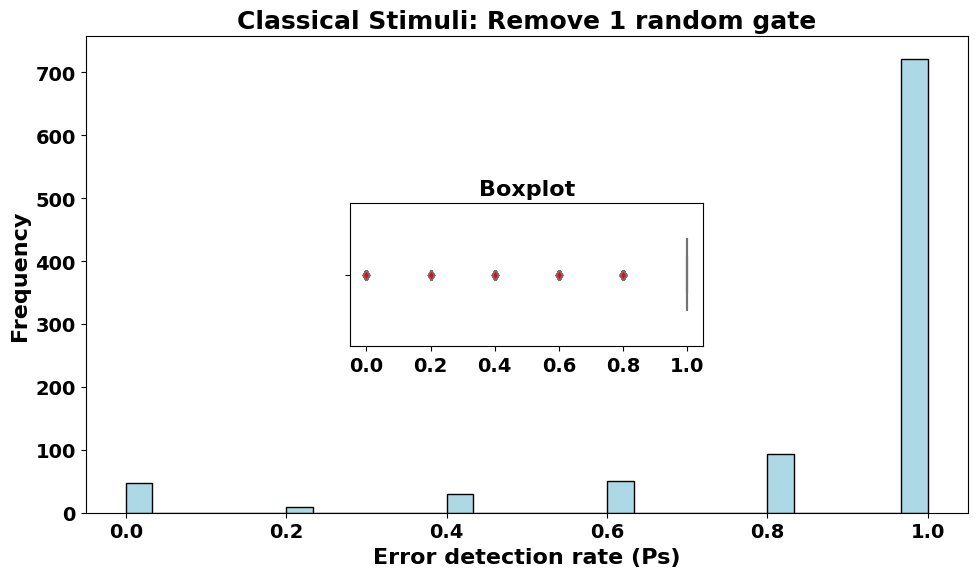

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

# Load the data from the CSV file
df_main_new = pd.read_csv('main_qcec_experiment_00.csv')

# Extract the relevant data
data_string = df_main_new[(df_main_new["Unnamed: 0"] == "Remove 1 random gate") & (df_main_new["Unnamed: 1"] == "Ps")]["classical"].values[0]

# Convert string representation of a list to an actual list
data_list = ast.literal_eval(data_string)

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 14,
    'font.weight': 'bold'
})

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram on the main axis
ax1.hist(data_list, bins=30, color='lightblue', edgecolor='black')
ax1.set_xlabel("Error detection rate (Ps)", fontsize=16, weight='bold')
ax1.set_ylabel("Frequency", fontsize=16, weight='bold')
ax1.set_title("Classical Stimuli: Remove 1 random gate", fontsize=18, weight='bold')

# Create an inset axis for the boxplot in the middle of the main plot with increased size
ax2 = ax1.inset_axes([0.3, 0.35, 0.4, 0.3])  # x, y, width, height
sns.boxplot(x=data_list, ax=ax2, color='lightgreen', width=0.5, fliersize=5, flierprops=dict(markerfacecolor='red'))
ax2.set_xlabel('')
ax2.set_title('Boxplot', fontsize=16, weight='bold')

# Show the plots
plt.tight_layout()
plt.savefig("classical_combined_remove_1.pdf")
plt.show()


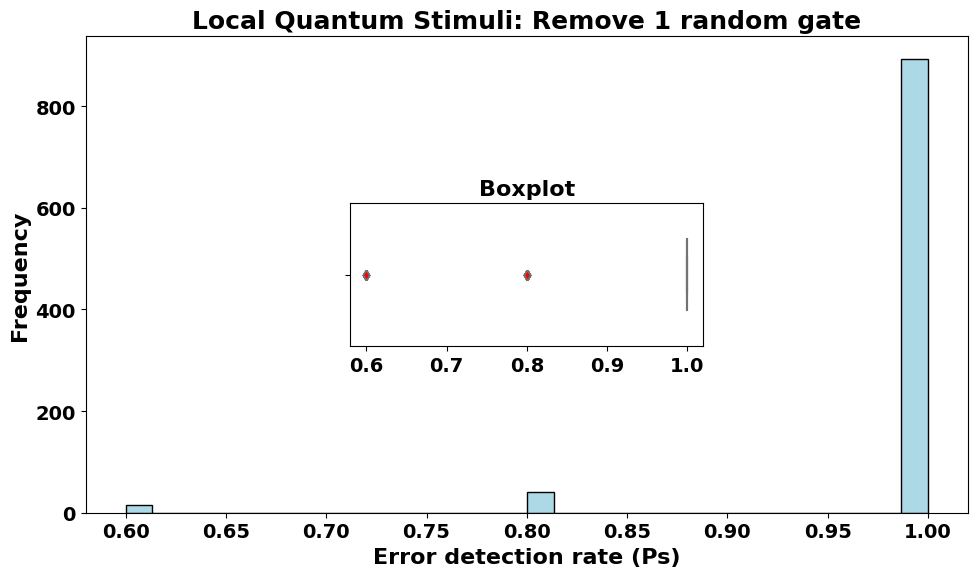

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

# Load the data from the CSV file
df_main_new = pd.read_csv('main_qcec_experiment_00.csv')

# Extract the relevant data
data_string = df_main_new[(df_main_new["Unnamed: 0"] == "Remove 1 random gate") & (df_main_new["Unnamed: 1"] == "Ps")]["local"].values[0]

# Convert string representation of a list to an actual list
data_list = ast.literal_eval(data_string)

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 14,
    'font.weight': 'bold'
})

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram on the main axis
ax1.hist(data_list, bins=30, color='lightblue', edgecolor='black')
ax1.set_xlabel("Error detection rate (Ps)", fontsize=16, weight='bold')
ax1.set_ylabel("Frequency", fontsize=16, weight='bold')
ax1.set_title("Local Quantum Stimuli: Remove 1 random gate", fontsize=18, weight='bold')

# Create an inset axis for the boxplot in the middle of the main plot with increased size
ax2 = ax1.inset_axes([0.3, 0.35, 0.4, 0.3])  # x, y, width, height
sns.boxplot(x=data_list, ax=ax2, color='lightgreen', width=0.5, fliersize=5, flierprops=dict(markerfacecolor='red'))
ax2.set_xlabel('')
ax2.set_title('Boxplot', fontsize=16, weight='bold')

# Show the plots
plt.tight_layout()
plt.savefig("local_combined_remove_1.pdf")
plt.show()


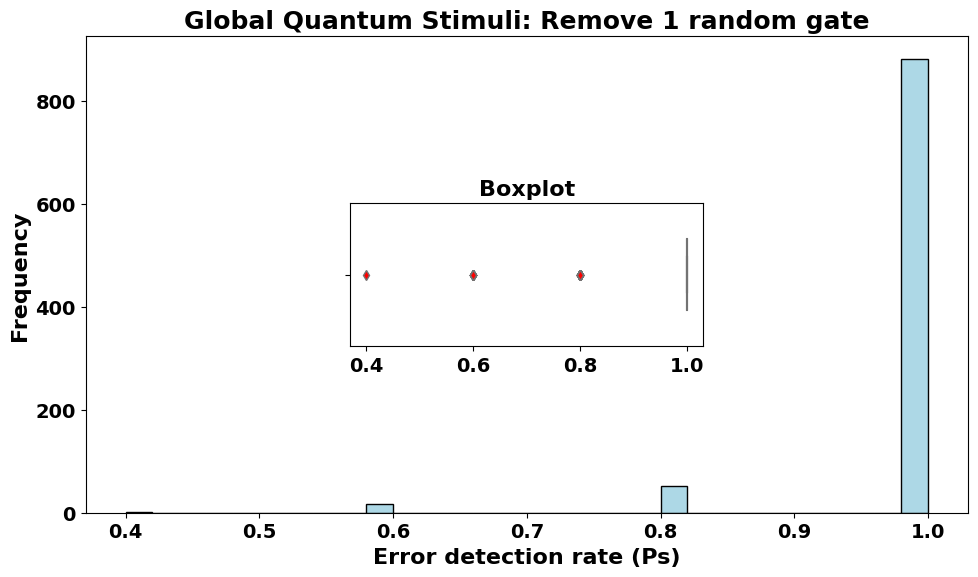

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

# Load the data from the CSV file
df_main_new = pd.read_csv('main_qcec_experiment_00.csv')

# Extract the relevant data
data_string = df_main_new[(df_main_new["Unnamed: 0"] == "Remove 1 random gate") & (df_main_new["Unnamed: 1"] == "Ps")]["global"].values[0]

# Convert string representation of a list to an actual list
data_list = ast.literal_eval(data_string)

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 14,
    'font.weight': 'bold'
})

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram on the main axis
ax1.hist(data_list, bins=30, color='lightblue', edgecolor='black')
ax1.set_xlabel("Error detection rate (Ps)", fontsize=16, weight='bold')
ax1.set_ylabel("Frequency", fontsize=16, weight='bold')
ax1.set_title("Global Quantum Stimuli: Remove 1 random gate", fontsize=18, weight='bold')

# Create an inset axis for the boxplot in the middle of the main plot with increased size
ax2 = ax1.inset_axes([0.3, 0.35, 0.4, 0.3])  # x, y, width, height
sns.boxplot(x=data_list, ax=ax2, color='lightgreen', width=0.5, fliersize=5, flierprops=dict(markerfacecolor='red'))
ax2.set_xlabel('')
ax2.set_title('Boxplot', fontsize=16, weight='bold')

# Show the plots
plt.tight_layout()
plt.savefig("global_combined_remove_1.pdf")
plt.show()


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

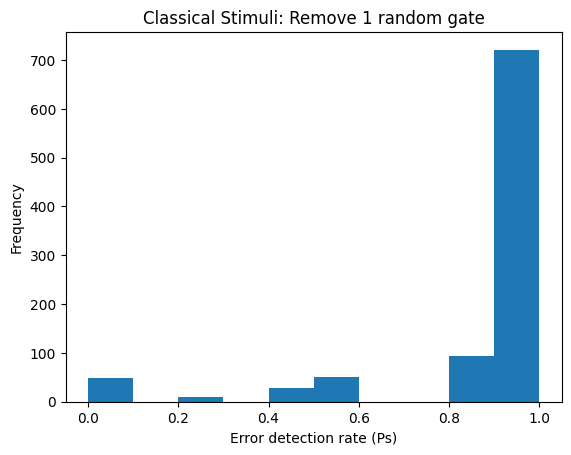

In [77]:
plt.hist(df_main["classical"]["Remove 1 random gate"][0])
plt.xlabel("Error detection rate (Ps)")
plt.ylabel("Frequency")
plt.title("Classical Stimuli: Remove 1 random gate")
plt.savefig("classical_remove_1.pdf")

In [25]:
len(df_main["classical"]["Remove 1 random gate"][0])

950

In [89]:
len(df_main["classical"]["Remove 2 random gates"][0])

950

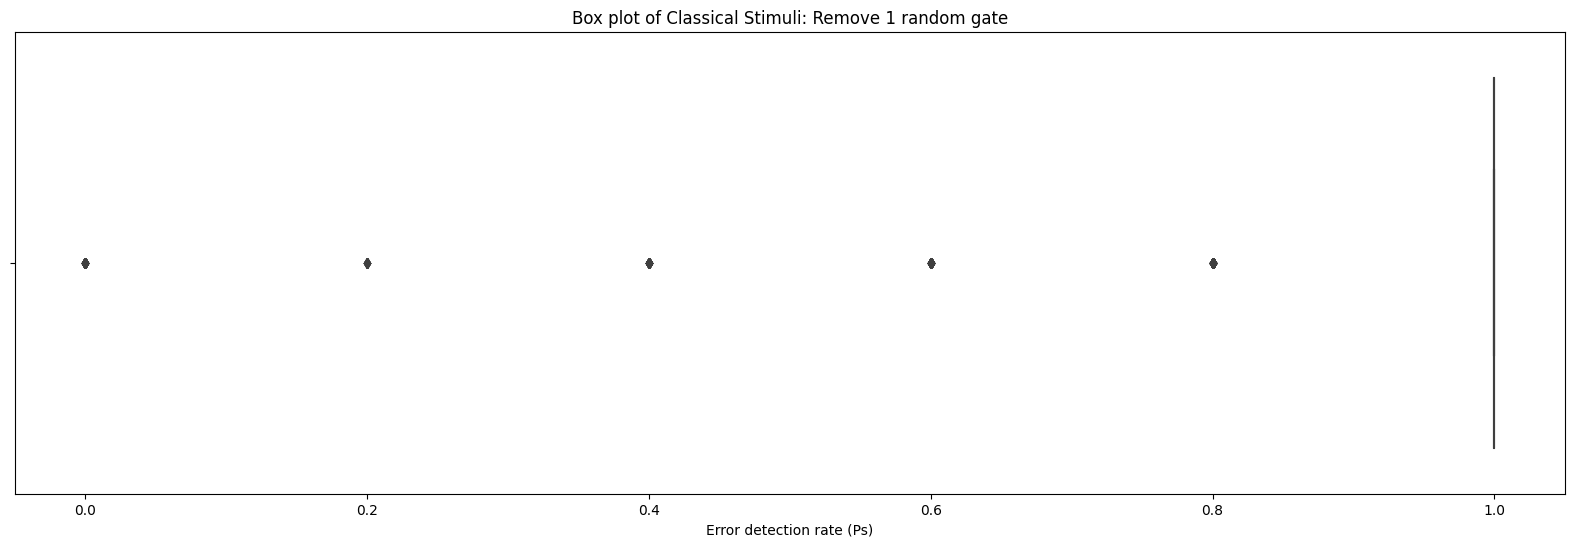

In [67]:
import seaborn as sns
# Box Plot
fig, ax = plt.subplots(figsize=(20,6))



sns.boxplot(data=df_main["classical"], x=df_main["classical"]["Remove 1 random gate"][0], sym="red")
plt.xlabel("Error detection rate (Ps)")
plt.title("Box plot of Classical Stimuli: Remove 1 random gate")
plt.savefig("classical_remove_1_box.pdf")

plt.show()

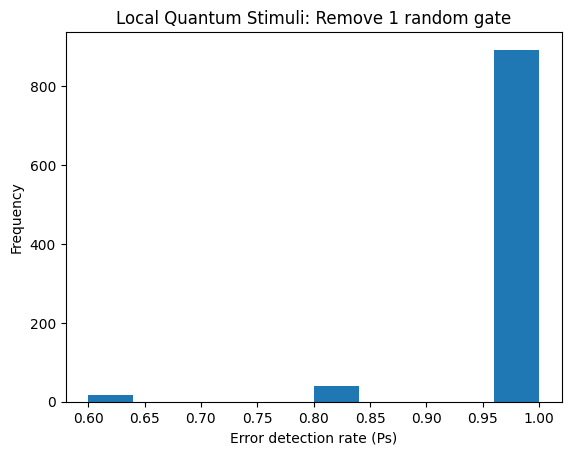

In [74]:
plt.hist(df_main["local"]["Remove 1 random gate"][0])
plt.xlabel("Error detection rate (Ps)")
plt.ylabel("Frequency")
plt.title("Local Quantum Stimuli: Remove 1 random gate")
plt.savefig("local_remove_1.pdf")

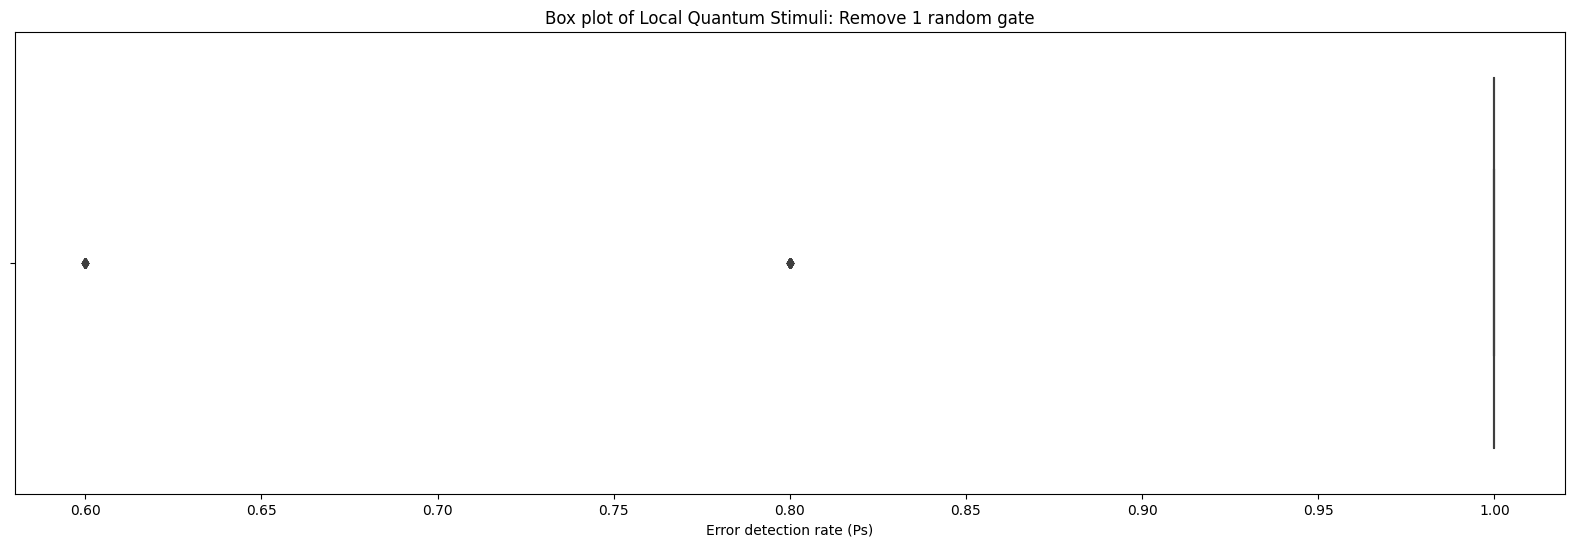

In [69]:
import seaborn as sns
# Box Plot
fig, ax = plt.subplots(figsize=(20,6))



sns.boxplot(data=df_main["local"], x=df_main["local"]["Remove 1 random gate"][0], sym="red")
plt.xlabel("Error detection rate (Ps)")
plt.title("Box plot of Local Quantum Stimuli: Remove 1 random gate")
plt.savefig("local_remove_1_box.pdf")

plt.show()

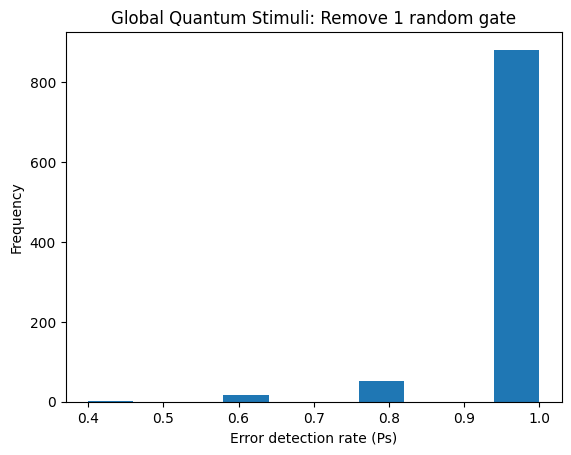

In [75]:
plt.hist(df_main["global"]["Remove 1 random gate"][0])
plt.xlabel("Error detection rate (Ps)")
plt.ylabel("Frequency")
plt.title("Global Quantum Stimuli: Remove 1 random gate")
plt.savefig("global_remove_1.pdf")

In [54]:
# df_main

In [59]:
new_df = pd.DataFrame.from_dict({"Global Stimuli: Average Error Detection Rate (Ps (%))": 
                                 df_main["global"]["Remove 1 random gate"][0]})

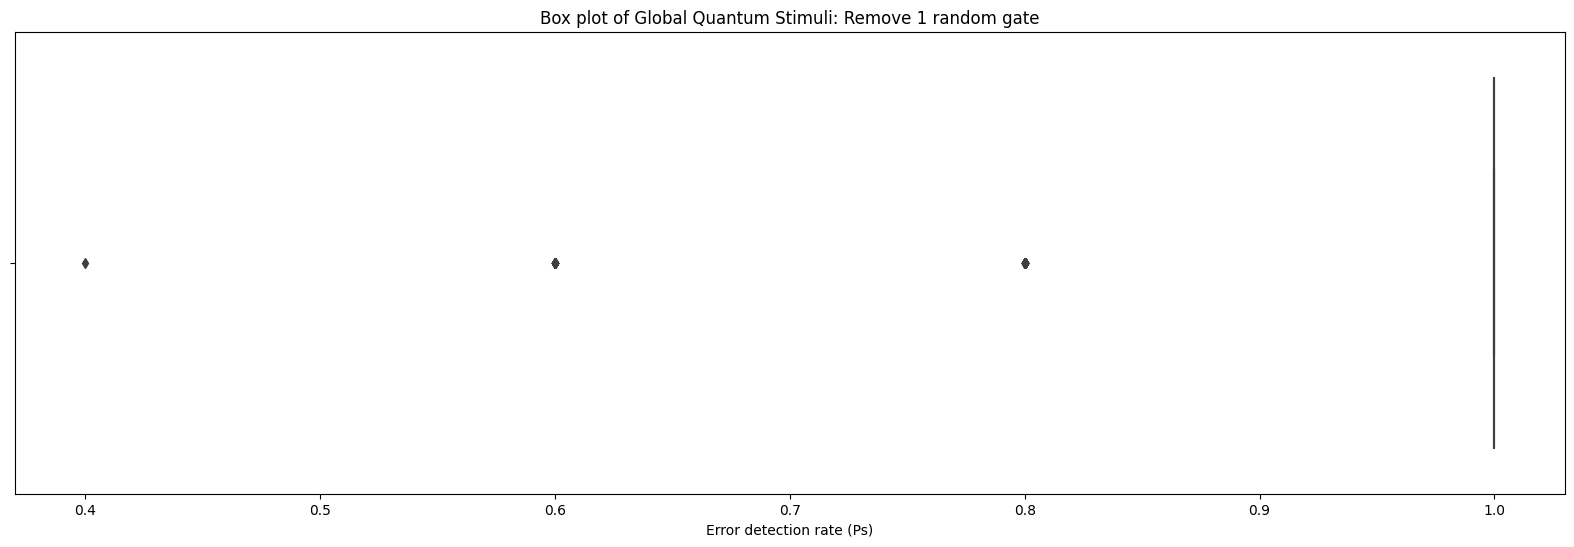

In [76]:
import seaborn as sns
# Box Plot
fig, ax = plt.subplots(figsize=(20,6))



# sns.boxplot(data=df_main, x=df_main["global"]["Remove 1 random gate"][0], sym="red")
# sns.boxplot(data=new_df, x=new_df["Global Stimuli: Average Error Detection Rate (Ps (%))"], sym="red")
# plt.show()

sns.boxplot(data=df_main["global"], x=df_main["global"]["Remove 1 random gate"][0], sym="red")
plt.xlabel("Error detection rate (Ps)")
plt.title("Box plot of Global Quantum Stimuli: Remove 1 random gate")
plt.savefig("global_remove_1_box.pdf")

plt.show()